In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import root_scalar

The probability of waiting between 2 and 4 hours is:  4.669712174236612e-08
The mean is:  0.4152340360094002
The variance is:  0.047782715541364346
The Q1 is:  0.25039555927001056
The Q2 is:  0.3891305419962577
The Q3 is:  0.5514473389472023


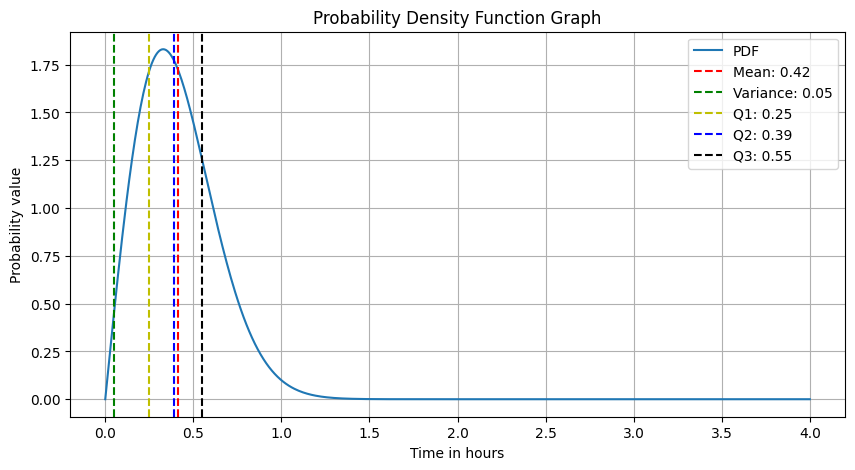

In [2]:
# We first define the probability density function pdf.

def pdf(y):
    return (10 / 99) * np.exp(-5 * y ** 2) * (32 * np.exp(y ** 2) + 59) * y

# Then we can define the cumulative density function cdf
def cdf(y):
    return 1 - ((40 / 99) * np.exp(-4 * y ** 2) + (59 / 99) * np.exp(-5 * y ** 2))

# Then we calculate the probability of waiting between 2 and 4 hours using the definite integral function quad.
# We print the calculated probability by taking only the first item prob[0].
# We exclude the second which is the absolute error, as quad returns an array of probability and absolute error.
print("The probability of waiting between 2 and 4 hours is: ", quad(pdf, 2, 4)[0])

# In order to calculate our probabilities, we will first create a range of our independent values.
# We will create 500 values between 0 and 4 using linspace function following by determining the probabilities.
y_values = np.linspace(0, 4, 500)
prob_values = pdf(y_values)

# Calculating the mean and variance using the correspondent math formulas over 0 to infinite.
# The intervals are from 0 to infinite, since they describe time, however, we are integrating until 24 hours to
# prevent overflow when using the function quad. 24h should be enough, as the probability is extremely small.
mean = quad(lambda y: y * pdf(y), 0, 24)[0]
variance = (quad(lambda y: y ** 2 * pdf(y), 0, 24)[0]) - mean ** 2

# To display the quartiles, we extract the root (found by approximating within the specified bracket parameter).
# Function corresponds to cdf(y)-probability=0, where the resulting y is the quantile of the specified probability.
def get_quantile(probability):
    return root_scalar(lambda y: cdf(y) - probability, bracket=[0, 10]).root

q1 = get_quantile(0.25)
q2 = get_quantile(0.50)
q3 = get_quantile(0.75)

# Printing in the console the mean, variance, and quantiles.
print("The mean is: ", mean)
print("The variance is: ", variance)
print("The Q1 is: ", q1)
print("The Q2 is: ", q2)
print("The Q3 is: ", q3)

# Now we can plot and display the pdf graph.
# We will also display the representation lines of the Mean, Variance, Q1, Q2, and Q3.
plt.figure(figsize=(10, 5))
plt.plot(y_values, prob_values, label='PDF')
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(variance, color='g', linestyle='--', label=f'Variance: {variance:.2f}')
plt.axvline(q1, color='y', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='b', linestyle='--', label=f'Q2: {q2:.2f}')
plt.axvline(q3, color='k', linestyle='--', label=f'Q3: {q3:.2f}')
plt.xlabel('Time in hours')
plt.ylabel('Probability value')
plt.title('Probability Density Function Graph')
plt.legend()
plt.grid(True)
plt.show()

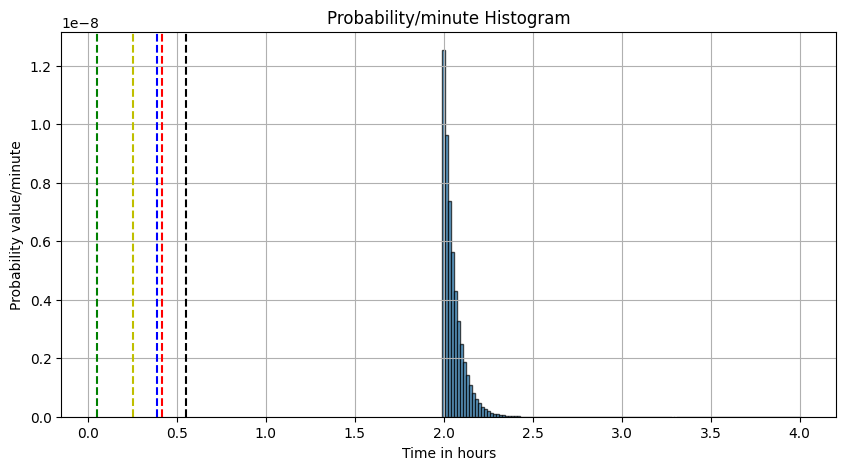

In [3]:
# In order to display the histogram, we will generate 120 values between 2 and 4, which corresponds to 4h-2h=2hours.
# Then we will determine the probabilities in each probability value.
# Then divide by 60 to obtain the actual probability per given minute.
y_values_minutes = np.linspace(2, 4, 120)
prob_values_minutes = pdf(y_values_minutes)
prob_per_minute = prob_values_minutes / 60

# Now we can plot the histogram displaying each bar with the probability of being in that minute.
plt.figure(figsize=(10, 5))
plt.bar(y_values_minutes, prob_per_minute, width=1 / 60, edgecolor='black', alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(variance, color='g', linestyle='--', label=f'Variance: {variance:.2f}')
plt.axvline(q1, color='y', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='b', linestyle='--', label=f'Q2: {q2:.2f}')
plt.axvline(q3, color='k', linestyle='--', label=f'Q3: {q3:.2f}')
plt.xlabel('Time in hours')
plt.ylabel('Probability value/minute')
plt.title('Probability/minute Histogram')
plt.grid(True)
plt.show()